# Least Dangerous Path
Introdução a Otimização (COM361)

Professor Amit Bhaya 
2022.2

Henrique Marques Lozano (henriquemarques@poli.ufrj.br), Matheus Gomes Rocha (matheusxvtb@poli.ufrj.br)


### Índice

1. Introdução
2. Modelo Matemático
3. Solução
4. Resultados e Discussão
5. Subseção Opcional
6. Conclusão
7. Referências bibliográficas

## 1. Introdução ##
É notório que, há noticias sobre acidentes envolvendo rotas perigosas na televisão, tal qual, um Uber entrando em zonas perigosas no estado do Rio de Janeiro: 


-[homem e morto a tiros em acesso ao complexo do chapadao](https://g1.globo.com/rj/rio-de-janeiro/noticia/2022/10/27/homem-e-morto-a-tiros-em-acesso-ao-complexo-do-chapadao.ghtml). 

Famílias entrando em zonas gélidas e perdendo o controle do carro e consequentemente sofrendo um acidente: 

-[Woman killed after her car loses control on icy I-35W ramp in Minneapolis](https://www.cbsnews.com/minnesota/news/woman-killed-after-her-car-loses-control-on-i-35w-ramp-in-minneapolis/). 

Ou caminhos onde o trajeto é totalmente inacessível pois há muitos locais danificados pelo tempo, a ideia primordial por trás desse trabalho é criar um algoritmo que consiga traçar rotas seguras e eficientes independentes do relevo, seja ele alto, baixo, obtuso, entre outras formas de relevo e com menor custo e risco para o usuário, de forma que ela consiga sair do seu ponto inicial e ir até o seu ponto final de destino da melhor forma possível, e claro, segura.


Vamos iniciar a criação do código da seguinte forma, primeiros criaremos o terreno no qual será feito os testes, será feita uma analise minuciosa para decidir quais serão as restrições do problema, por exemplo: Terrenos muito íngremes, com formatos muito repetidos, cumes muito acentuados e crateras, ou então, rever se o algoritmo está criando um caminho possível de ser realizado, cada situação será analisada de forma prática para que se assemelhe a realidade. Com o algoritmo de Dijkstra, você poderá encontrar o caminho de menor custo entre nós em um grafo. Particularmente, você poderá encontrar o caminho de menor custo entre um nó (denominado “origem”) e todos os outros nós do grafo, produzindo uma árvore de custo mínimo. Este algoritmo é usado em dispositivos GPS para encontrar o caminho mais curto entre a localização atual e o destino. A nossa formulação foi fundamentada nos principios do problema de fluxo de custo mínimo.




## 2. Modelo matemático ##

O problema do caminho mais curto/seguro é talvez o problema mais famoso e importante na otimização de redes. Ele encontra um caminho de um determinado nó de origem para um determinado nó de destino com o/a menor/maior custo/segurança de/do caminho. Mas, no nosso caso, vamos utilizar a altura do nosso relevo, considere como se fosse o esforço para conseguir subir um degrau, ou como no exemplo abaixo, o senhor Gato quer pegar o senhor Rato, mas, ele apenas pode pular em uma altura de 1 bloco, pois, se caso tente pular em um bloco que possui 2.1 de altura, ele certamente cairá e vai se machucar (Por motivos médicos, o Senhor Gato não consegue cair de pé), logo, o caminho mais seguro a se fazer é 'A -> D -> E -> C', esse é um caso especial do problema de fluxo de rede de custo mínimo; portanto, o problema do caminho mais curto pode ser resolvido como um problema de programação linear, e utilizando a otimização de fluxo de custo mínimo. A partir da matriz discreta do terreno, devemos entender, qual o custo de deslocar-se de um ponto A a outro B. Assumindo MRU sem atrito, a unica variacao de energia ocorre com a mudanca de altura. Para esse caso, subir uma altura $ h $ custa a mesma energia que descer ela. Com isso em mente, geramos uma matriz quadrada com linhas que representam os nos de origem e as colunas os nos de saida. Essa matriz é simetrica na diagonal e preenchida pelas diferencas de altura entre pontos adjacentes. um exemplo desse problema é:


<p align="center">
  <img src="assets/to_readme/Cat_and_Rat.png">
</p>




Grafo do problema acima:

<p align="center">
  <img width= "470" src="assets/to_readme/exemplo_1.png">
</p>



E em sua forma matricial:

\begin{vmatrix}
  & A & B & C & D &E\\

A & 0 & 2.1 & \infty & 1 & \infty\\

B & \infty & 0 & 1 & \infty & \infty\\

C & \infty & \infty & 0 & \infty & \infty\\

D & \infty & \infty & \infty & 0 & 1\\

E & \infty & \infty & 1 & \infty & 0\\
\end{vmatrix}


Abaixo, há um modelo matemático simples de problema de custo/esforço mínimo que utilizamos como base a função objetivo:


\begin{aligned}
\min_{Z} \sum_{i=1}^n \sum_{j=1}^n c_{ij} x_{ij} \\
\end{aligned}


Sujeito a:

\begin{aligned}
\sum_{j=1}^n x_{ij} - \sum_{j=1}^n x_{ji} = b_i
\
\text{Para cada nó $i$} 
\begin{cases}
     \sum_{j=1}^n x_{ij} = \text{fluxo sai no nó i}\\
     \sum_{j=1}^n x_{ji} = \text{fluxo chega no nó i}
\end{cases}

\end{aligned}

\begin{aligned}
\ 0 \le x_{ij} \le u_{ij}\ \text{Para cada arco(i, j)}
\end{aligned}



Esse modelo matemático requer uma rede representada por um Dígrafo(orientada) e conectada, onde nos $n$ nós incluem-se no mínimo um nó de fornecimento e no mínimo um nó de demanda, com a variável de decisão é:
\begin{aligned} 
x_{ij} = \text{Fluxo no arco (i, j)}
\end{aligned}

Com os parâmetros :
\begin{aligned} c_{ij} \implies \text{Custo unitário do fluxo em (i, j)}
\end{aligned}

\begin{aligned} u_{ij} \implies \text{Capacidade do fluxo em (i, j)}
\end{aligned}

\begin{aligned} b_{i} \implies \text{Fluxo gerado na rede no nó $i$} \implies \begin{cases} b_i > 0& \text{Se o nó $i$ for um nó de origem.}\\ b_i < 0& \text{Se o nó $i$ for um nó de destino.}\\ b_i = 0& \text{Se o nó $i$ for um nó de intermediário}\\ \end{cases}
\end{aligned}

O problema de transporte, caminho mais curto onde se utiliza o algoritmo de Dijkstra tal esse que é uma possível solução para o problema em que foi proposto, de caminho de mínimo esforço. Funciona fundamentalmente em grafos não orientados e orientados, mas, as arestas em questão apenas podem possuir valores positivos. 

Para a entrada, deverá ser um Grafo ponderado:

\begin{aligned}
 G=(N, E) 
\end{aligned}
E nó origem: 
\begin{aligned}
 O \in N 
\end{aligned}
De modo que todos os custos entre as arestas sejam positivos.

A saída será o comprimento do caminho menos custoso de um nó selecionado de origem:
\begin{aligned}
 O \in N 
\end{aligned}
Para todos os outros nós em questão.

E esse fantástico algoritmo funciona da seguinte forma, ele identifica, a partir do nó de origem qual vai ser o caminho menos custoso entre ele e todos os outros do grafo. No começo, o conjunto de nós subsequentes possuem apenas o nó inicial de origem, na medida que ocorre um avanço no grafo, ele seleciona o próximo nó que está mais perto do inicial, após selecionar, a distancia entre cada nó é atualizada, com base na distancia em relação à origem, com base nesse novo ponto, a distância relativa entre nó final vai ficando cada vez menor, e essa é a sua nova posição.
É notório que, após escolher um nó como origem da pesquisa, o algoritmo de Dijkstra calcula o caminho de menor esforço entre esse nó até os subsequentes do grafo. O procedimento é iterativo entre cada etapa e determinando, na interação 1, o nó mais próximo e menos custoso do nó de origem O, nas proximas iterações, o segundo nó mais próximo do nó O, e assim consequitivamente, até que finalmente se alcance o ponto de de destino, após n iterações.
Considerando que há um grafo orientado G=(N, E) e p é um nó desse grafo G, inicialmente devemos colocar um valor zero à cada estimativa do esforço mínimo do nó de origem e infinito às demais estimativas. 
Mas todos esses casos são ramificações do Problema de Fluxo de Custo Mínimo, para modelar esse problema, é necessário que a rede seja representada por um Dígrafo, que no mínimo um dos nós seja de destino, no mínimo um dos nós seja de destino e todos os restantes sejam intermediários para conectar todos os nós. O custo do fluxo através do arco precisa ser proporcional a quantidade daquele fluxo, onde o custo por unidade de fluxo seja conhecido.

Utilizando o grafo G = (Origem, Chegada) com custos arbitrários nos arcos, o custo de um caminho é a soma de todos os custos dos arcos nesse caminho, considerando sem repetições. Por exemplo, se todos os arcos têm custo 1, o custo do caminho total é igual ao seu comprimento até o destino. Um caminho paralelo, ou uma das ramificações dos caminhos, é mais barato que o caminho que for escolhido, se esse caminho paralelo tiver obviamente um custo menor. Assumimos, por definição, que, se não houver outra ramificação com menor custo em um dos arcos, esse caminho escolhido tem custo mínimo. Se não houver caminho algum entre Origem e chegada, o problema não tem solução. Se em geral todos os custos são positivos, a própria relação entre o comprimento total e o custo de um caminho é totalmente intuitiva, pois qualquer pedaço escolhido é mais barato que o caminho todo. Se no problema houver arcos com custo negativo, então ele representa ganho no sistema. 

Considere o exemplo abaixo:



<p align="center">
  <img width= "470" src="assets/to_readme/exemplo_2.png">
</p>


A imagem acima mostra um grafo com custos positivos em seus arcos, o comprimento geométrico de cada arco na figura é proporcional ao seu custo. Vale a pena notar que, mesmo o caminho (A -> B -> C) seja o mais rápido, pelo fato de exigir apenas 3 etapas, ao todo ele não possui o caminho com custo mínimo, pois não é o mais barato, logo o caminho menos custoso é o (A -> D -> B -> E -> C), de fato exige mais etapas, mas sem dúvidas é o que exige menos custo. Essa é a ideia principal do Caminho por Custo Mínimo que está sendo empregada para o desenvolvimento do algorítmo desse trabalho, e esses 2 exemplos mostrados serão resolvidos até o final do mesmo.




## 3. Solução ##



### 3.1 Carregando os solvedores. ###



In [1]:
using JuMP
using Clp, HiGHS, Ipopt, Juniper
using Plots
using LinearAlgebra
using NamedArrays
using Graphs, GraphPlot, SimpleWeightedGraphs

Plots.gr();

### 3.2 Criação o Campo de custo de terreno básico para testes iniciais de caminho. ###



11×11 Matrix{Float64}:
 0.135  0.194  0.257  0.313  0.353  0.368  0.353  0.313  0.257  0.194  0.135
 0.194  0.278  0.368  0.449  0.507  0.527  0.507  0.449  0.368  0.278  0.194
 0.257  0.368  0.487  0.595  0.67   0.698  0.67   0.595  0.487  0.368  0.257
 0.313  0.449  0.595  0.726  0.819  0.852  0.819  0.726  0.595  0.449  0.313
 0.353  0.507  0.67   0.819  0.923  0.961  0.923  0.819  0.67   0.507  0.353
 0.368  0.527  0.698  0.852  0.961  1.0    0.961  0.852  0.698  0.527  0.368
 0.353  0.507  0.67   0.819  0.923  0.961  0.923  0.819  0.67   0.507  0.353
 0.313  0.449  0.595  0.726  0.819  0.852  0.819  0.726  0.595  0.449  0.313
 0.257  0.368  0.487  0.595  0.67   0.698  0.67   0.595  0.487  0.368  0.257
 0.194  0.278  0.368  0.449  0.507  0.527  0.507  0.449  0.368  0.278  0.194
 0.135  0.194  0.257  0.313  0.353  0.368  0.353  0.313  0.257  0.194  0.135

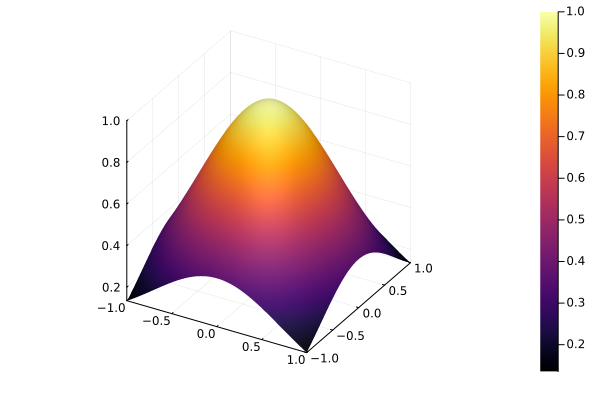

In [3]:
# Basic terrain cost field for initial pathing tests

basicTerrain(x, y) = exp(-1(x^2 + y^2))

# Interpret as going from -boundary to boundary in resolution steps
boundary = 1
resolution = 5

# Generate discrete field
discreteField = zeros(boundary * resolution * 2 + 1, boundary * resolution * 2 + 1)

for i in 1:resolution*boundary*2+1
  for j in 1:resolution*boundary*2+1
    
    # Rearange axis
    x = (i - resolution * boundary - 1) / resolution
    y = (j - resolution * boundary - 1) / resolution
    discreteField[i,j] = round(basicTerrain(x,y), digits=3)
  
  end
end

# Show graph
show(stdout, "text/plain", discreteField)

f(x, y) = sin(x) + cos(y)
surface(-boundary:0.1/resolution:boundary, -boundary:0.1/resolution:boundary, basicTerrain)

### 3.3 Campo Discreto. ###



In [4]:
# Text discrete field matrix
#discreteField = [1 4 7; 
#                 2 5 8; 
#                 3 6 9]

# Conection matrix from discrete field
connectionMatrix = fill(Inf, (length(discreteField), length(discreteField)))

# Dimensions from discrete field are usefull
verticalSize = size(discreteField, 1)
horizontalSize = size(discreteField, 2)

#println("verticalSize ", verticalSize)
#println("horizontalSize ", horizontalSize)

# Complete conection matrix
# Algorithm has complexity O(n²)
for j in axes(discreteField, 2)
  for i in axes(discreteField, 1)
    # Matrix is iterated from top to bottom
    # then from left to right
    loc = (j - 1) * verticalSize + i
    #println((i,j)," ", loc)

    # Not at left boundary
    if loc > verticalSize
      #println("Left connection at ", (i,j), " to ", (i,j - 1))
      connectionMatrix[loc,loc - horizontalSize] = abs(discreteField[i,j] - discreteField[i,j - 1])
    end

    # Not at right boundary
    if loc ≤ verticalSize * (horizontalSize - 1)
      #println("Right connection at ", (i,j), " to ", (i,j + 1))
      connectionMatrix[loc,loc + horizontalSize] = abs(discreteField[i,j] - discreteField[i,j + 1])
    end
    
    # Not at bottom boundary
    if loc % verticalSize != 0
      #println("Lower connection at ", (i,j), " to ", (i + 1,j))
      connectionMatrix[loc,loc + 1] = abs(discreteField[i,j] - discreteField[i + 1,j])
    end

    # Not at top boundary
    if loc % verticalSize != 1
      #println("Upper connection at ", (i,j), " to ", (i - 1,j))
      connectionMatrix[loc,loc - 1] = abs(discreteField[i,j] - discreteField[i - 1,j])
    end
  end
end

#connectionMatrix[connectionMatrix.==Inf] .= 0

# Visually clear matrix
namedArray = NamedArray(connectionMatrix)
setdimnames!(namedArray, ("Origin", "Destiny"));
namedArray

121×121 Named Matrix{Float64}
Origin ╲ Destiny │     1      2      3      4  …    118    119    120    121
─────────────────┼──────────────────────────────────────────────────────────
1                │   Inf  0.059    Inf    Inf  …    Inf    Inf    Inf    Inf
2                │ 0.059    Inf  0.063    Inf       Inf    Inf    Inf    Inf
3                │   Inf  0.063    Inf  0.056       Inf    Inf    Inf    Inf
4                │   Inf    Inf  0.056    Inf       Inf    Inf    Inf    Inf
5                │   Inf    Inf    Inf   0.04       Inf    Inf    Inf    Inf
6                │   Inf    Inf    Inf    Inf       Inf    Inf    Inf    Inf
7                │   Inf    Inf    Inf    Inf       Inf    Inf    Inf    Inf
8                │   Inf    Inf    Inf    Inf       Inf    Inf    Inf    Inf
9                │   Inf    Inf    Inf    Inf       Inf    Inf    Inf    Inf
10               │   Inf    Inf    Inf    Inf       Inf    Inf    Inf    Inf
11               │   Inf    Inf    Inf    Inf 

### 3.4 Matriz de Conexões e Custo do trajeto final. ###

In [5]:
connectionMatrix[connectionMatrix.==Inf] .= 0

#connectionMatrix = [0   2.1   0   1   0; # <---- if you want to create an example, just modify this graph as you wish
#                    0   0   1   0   1;
#                    0   0   0   0   0;
#                    0   0   0   0   1;
#                    0   0   1   0   0
#                    ]

#connectionMatrix = [0 1 2 0 0;
#                    1 0 0 0 3;
#                    2 0 0 1 0;
#                    0 0 1 0 1;
#                    0 3 0 1 0
#                    ]

n = size(connectionMatrix, 1)
b = zeros(1,n)
start = 1
b[start] = 1
b[n ÷ 2 + 1] = -1

nl_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level"=>0)
mip_solver = optimizer_with_attributes(HiGHS.Optimizer, "output_flag"=>false)
minlp_solver = optimizer_with_attributes(Juniper.Optimizer, "nl_solver"=>nl_solver, "mip_solver"=>mip_solver)


m = Model(minlp_solver)
set_silent(m)

# Choice binary matrix
@variable(m, x[1:n, 1:n], Bin)

# Paths with cost zero should be ignored
@constraint(m, [i = 1:n, j = 1:n; connectionMatrix[i, j] == 0], x[i, j] == 0)

# Flow conservation constraint
@constraint(m, [i = 1:n], sum(x[i, :]) - sum(x[:, i]) == b[i],)

@objective(m, Min, sum(connectionMatrix .* x))
optimize!(m)
println("The final Cost of the journey is: ", objective_value(m))

#show(IOContext(stdout, :limit => false, :displaysize => (30,30)), MIME"text/plain"(), connectionMatrix .* value.(x))



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

0; Iter: Time           0; average =           0; Bound =           0
100; Iter: Time           0; average =           0; Bound =           0
The final Cost of the journey is: 0.865


### 3.5 Contorno e trajetória do relevo qualquer gerado. ###

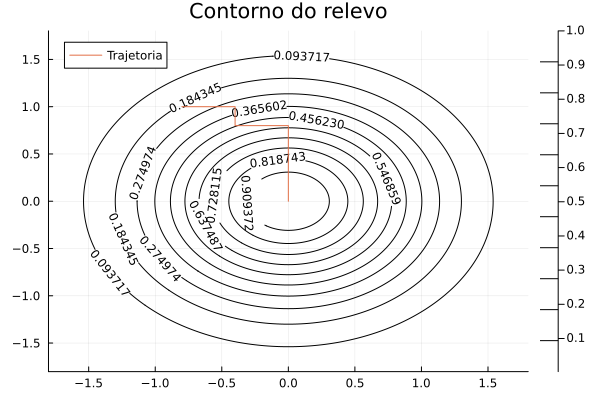

In [10]:
indexes = findall(x->x==1, value.(x))
points = []
for index in indexes
  point = (-(boundary - (index[2] - 1) % verticalSize / resolution),(boundary - (index[2]) ÷ verticalSize / resolution))
  push!(points, point)
end

contour(-1.7:0.1/resolution:1.7, -1.7:0.1/resolution:1.7, basicTerrain, color=:black, clabels=true, levels=10, cbar=true, title="Contorno do relevo")
plot!([point[1] for point in points], [point[2] for point in points], label="Trajetoria")

## 4. Resultados e discussão ##

### **4.1. Sr. Gato & Sr Rato**

\begin{aligned} 
\text{Neste seção, os resultados obtidos serão exibidos e discutidos.}\\
\end{aligned}


Não obstante, vamos começar pelo primeiro exemplo(Sr. Gato e o Sr. Rato). O problema em questão se dá por essa matriz:


\begin{vmatrix}
  & A & B & C & D &E\\

A & 0 & 2.1 & \infty & 1 & \infty\\

B & \infty & 0 & 1 & \infty & \infty\\

C & \infty & \infty & 0 & \infty & \infty\\

D & \infty & \infty & \infty & 0 & 1\\

E & \infty & \infty & 1 & \infty & 0\\
\end{vmatrix}

Colocando essa matriz no nosso código, obtemos a seguinte formulação:
<p align="center">
  <img width= "470" src="assets/to_readme/Matriz_de_conexão_Ex_1.png">
</p>

No momento em que o código se inicia, ele devolve esses valores:

<p align="center">
  <img width= "470" src="assets/to_readme/Resultado_Ex_1.png">
</p>

O que condiz exatamente como o esperado! o caminho feito por ele foi exatamente esse:


<p align="center">
  <img width= "470" src="assets/to_readme/ezgif.com-gif-maker.gif">
</p>
(Imagem ilustrativa do resultado.)

\begin{aligned} 
\text{O resultado final foi satisfatório para um exemplo simples!}\\ \\
\end{aligned}

### 4.2. **Segundo Exemplo** 

\begin{aligned} 
\text{Para o próximo exemplo, utilizaremos mais arestas para testarmos se o código está de fato funcional:}\\ \\
\end{aligned}

<p align="center">
  <img width= "470" src="assets/to_readme/exemplo_2.png">
</p>


A sua matriz de conexões se dá por:

\begin{vmatrix}
  & A & B & C & D &E\\

A & 0 & 5 & \infty & 1 & \infty\\

B & \infty & 0 & 5 & \infty & 2\\

C & \infty & \infty & 0 & \infty & \infty\\

D & \infty & 2 & \infty & 0 & 5\\

E & \infty & \infty & 1 & \infty & 0\\
\end{vmatrix}

Novamente colocando a matriz em nosso código, obtemos a seguinte formulação:

<p align="center">
  <img width= "470" src="assets/to_readme/Matriz_de_conexão_Ex_2.png">

</p>
A seguir está o valor final retornado, com uma incerteza de 0,00000003 como no exemplo anterior, foi bem satisfatório:
<p align="center">
  <img width= "470" src="assets/to_readme/Resultado_Ex_2.png">
</p>

\begin{aligned} 
\text{Abaixo está a ilustração do caminho feito:}
\end{aligned}

<p align="center">
  <img width= "470" src="assets/to_readme/ezgif.com-gif-maker_2.gif">
</p>
(Imagem ilustrativa do resultado.)


### 4.3. **Exemplo com Terreno Discreto aleatório.**

  Decidimos realizar um teste mais ousado, geramos um terreno discreto em 3 dimensões para simularmos um morro, o ponto de partida que utilizamos foi o ponto na coordenada xyz=(-0.75, 1.0, 0), e desejamos chegar no ponto (0.0, 0.0, 1), o terreno formado em questão foi:
<p align="center">
  <img width= "470" src="assets/to_readme/Terreno_qualquer.png">
</p>

Após colocar todos os parâmetros, foi gerada uma matriz de conexão bem robusta de 121x121 valores, logo mais, foi retornado o custo de toda a jornada, que se deu por:

<p align="center">
  <img width= "470" src="assets/to_readme/custo_Terreno_qualquer.png">
</p>

E com resultado final e percurso com o seu respectivo contorno:

<p align="center">
  <img width= "470" src="assets/to_readme/contorno_terreno_qualquer.png">
</p>

Não obstante, acreditamos viélmente que o código está de fato funcional, com suas respectivas limitações, tanto com relação ao tempo de processamento e limitações de terreno. Com isso em mente, conseguimos aplicar todo o conhecimento aprendido nesses testes em um novo projeto!


## 4.A. **Pseudo-Robô Carrinho** 

Abaixo, está a criação utilizando toda a técnica e experiência obtida nos exemplos anteriores. A ideia principal por trás desse adendo é fundamentada em princípios físicos e dinâmicos, tal qual, velocidade, impulso, posição, tempo e acúmulo de energia potencial.
 
 
O objetivo do Pseudo-Robô Carrinho é: Sair de um determinado ponto de origem, percorrer o trajeto, utilizar a propulsão para conseguir força e pegar impulso, acumular o máximo de energia potencial e utilizar a mesma para terminar o trajeto, sem utilizar o impulso. (Considere o seguinte exemplo, um menino sobe um morro com uma bicicleta, a partir do momento em que ele chega no topo, não há necessidade dele pedalar para descer e terminar o percurso até chegar no ponto final onde ele quer.) essa é uma das inspirações. o código em questão está abaixo:

### 4.A.1. **Definindo o terreno, energia potencial, pontos de destinos e restrições.** 

In [11]:
using JuMP, Ipopt
using Plots

basicTerrain(x, y) = exp(-1(x^2 + y^2)) + exp(-0.5((x-2)^2 + y^2)) 

function potential(vec)
    return basicTerrain(vec[1], vec[2])
end

k = 4              
instances = zeros(Int,4)  
wps = zeros(2,k)    

instances[1] = 1
instances[2] = 30
instances[3] = 70
instances[4] = 100

# define waypoints
wps = [-2 -2;
        0  0;
        1  0;
       -2 -2]

function least_dangerous(λ, ξ) 

    m = Model(Ipopt.Optimizer)
    register(m, :basicTerrain, 2, basicTerrain, autodiff=true)
    register(m, :sum, 1, sum; autodiff = true)
    set_optimizer_attributes(m, "print_level" => 0 )
    @variable(m, position[1:instances[k], 1:2]) # Position
    @variable(m, velocity[1:instances[k], 1:2]) # Velocity
    @variable(m, thrust[1:instances[k], 1:2])   # Thrust

    # Dynamics (no initial velocity)
    @constraint(m, velocity[1,:] .== [0 0])

    @constraint(m, [-0.5 -0.5] .<= velocity .<= [0.5 0.5])
    @constraint(m, [-0.5 -0.5] .<= thrust .<= [0.5 0.5])
    


    for t in 1:instances[k]-1
        # Position is updated in thrust
        @constraint(m, position[t+1,:] .== position[t,:] + velocity[t,:])
        @NLconstraint(m, velocity[t+1,:1] == velocity[t,:1] + thrust[t,:1] + ξ * (basicTerrain(position[t,:]...) - basicTerrain(position[t+1,:]...)))
        @NLconstraint(m, velocity[t+1,:2] == velocity[t,:2] + thrust[t,:2] + ξ * (basicTerrain(position[t,:]...) - basicTerrain(position[t+1,:]...)))
        @NLconstraint(m, sum(abs(thrust[t,:1])) <= 100)
        @NLconstraint(m, sum(abs(thrust[t,:2])) <= 100)
    end

    # Reach all waypoints
    for i in [1 k]
        @constraint(m, position[instances[i],:] .== wps[i,:])
    end

    @objective(m, Min, sum(thrust.^2) + λ * sum( (position[instances[2:k],:]-wps[2:k,:]).^2  ) )
    optimize!(m)
    
    J1 = value.(sum(thrust.^2))
    J2 = value.(sum( (position[instances[2:k],:]-wps[2:k,:]).^2  ))
    velocity = value.(velocity)
    thrust = value.(thrust)
    path = value.(position)
    
    return (velocity,thrust,path)
end

least_dangerous (generic function with 1 method)

### 4.A.2. **Definindo as variáveis Velocidade, impulso e caminho** 

In [12]:
λ = 10
ξ = 1
(velocity,thrust,path) = least_dangerous(λ, ξ)
#It takes a while to run! It takes a while to run! approximately 1 minute - 1 minute and 30 seconds

([1.742291724440479e-21 -9.327185874275818e-21; 0.005938595514839981 0.045215833417440114; … ; -0.12155334548688466 -0.08744252975507928; -0.12109048128646951 -0.08697964577505563], [0.005938595514839981 0.045215833417440114; 0.008686152895886909 0.042408392978106564; … ; -8.941419710969467e-9 1.083818883447822e-8; 1.4879692133643397e-8 1.4879737159170658e-8], [-2.0 -2.0; -2.0 -2.0; … ; -1.8784466545131155 -1.9125574702449206; -2.0 -2.0])

### 4.A.3. **Plotando contorno e o trajeto feito pelo Carrinho** 

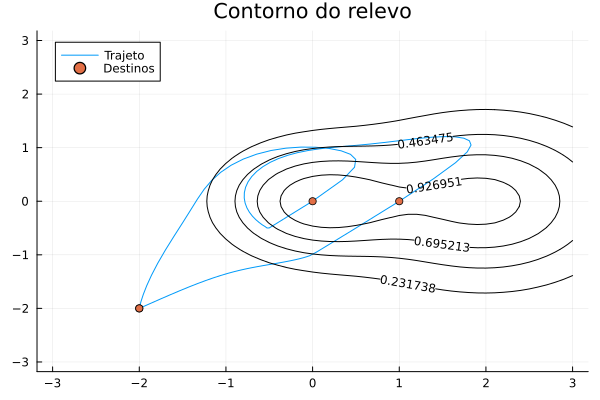

In [13]:
plot(path[:,1], path[:,2], label="Trajeto")
scatter!(wps[:,1], wps[:,2], label="Destinos")
contour!(-3:0.1:3, -3:0.1:3, basicTerrain, color=:black, clabels=true, levels=4, cbar=false, title="Contorno do relevo")

Acima, podemos confirmar que está de fato funcional! o carrinho sai do ponto de origem em (-2, -2) vai até o ponto (0, 0) utilizando o impulso, desce o cume sem utilizar o impulso, aproveita a carga de energia potencial e vai ate os outros pontos! e retorna para o ponto de origem.

### 4.A.4. **Plotando o gráfico da velocidade, impulso e caminho.** 

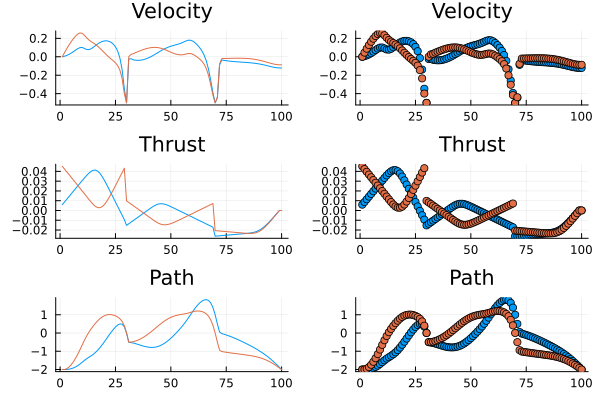

In [14]:
#velocity, impulse and route plot
p1 = plot(velocity, title="Velocity")
p2 = plot(velocity, seriestype=:scatter, label="data", title="Velocity")

p3 = plot(thrust, title="Thrust")
p4 = plot(thrust, seriestype=:scatter, label="data", title="Thrust")

p5 = plot(path, title="Path")
p6 = plot(path, seriestype=:scatter, label="data", title="Path")

plot(p1, p2, p3, p4, p5, p6, layout=(3, 2), legend=false)


#plot!(sqrt.(thrust[1,:].^2 + thrust[2,:].^2))
#plot!(basicTerrain.(path...))


### 4.A.5. **Plotando o módulo do impulso total em cada instante de tempo.** 

[0.008398442318534734, 0.012284075230209602, 0.016169604831075428, 0.02005489274809709, 0.02393974148190684, 0.02782387860586417, 0.03170638389231763, 0.03558497156948549, 0.039454032045319276, 0.043298877481277344, 0.04708133203935658, 0.05071046863173105, 0.05400221505427743, 0.05665112728121846, 0.05825201267584301, 0.058401838146593325, 0.05685808762675399, 0.05365740559073467, 0.04910287614008103, 0.04362519063275494, 0.037622499654486635, 0.0313714697335386, 0.02502404180479784, 0.018647906810409315, 0.012267294464423614, 0.005888962729505075, 0.00048568039032409195, 0.006856772226380999, 0.013225848467249522, 0.021586440720828323, 0.019287802079599993, 0.016989175464297405, 0.0146905672821377, 0.012391965028958726, 0.010093340614654863, 0.007794725677094291, 0.0054961030666096184, 0.003197479021028403, 0.000899188447615052, 0.0013931384428124403, 0.0036491517533017315, 0.005781070942298697, 0.007627719905424194, 0.008992315716232973, 0.009723388628506729, 0.009781441140420151, 0

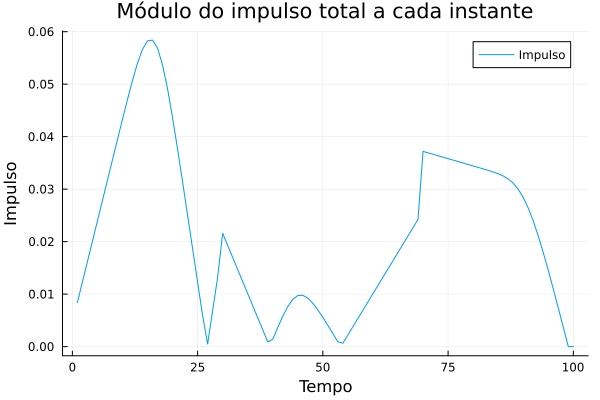

In [15]:
#Modulus of the total impulse at each instant
j = sqrt.(thrust[:,1].^2  + thrust[:,1].^2) 
println(j) #module value


plot(sqrt.(thrust[:,1].^2  + thrust[:,1].^2), label="Impulso", title="Módulo do impulso total a cada instante", xlabel="Tempo", ylabel="Impulso")

## 5. Conclusão ##

A idéia principal do trabalho era de fato criar um algorítmo que consiga traçar rotas seguras, mas, para diversas situações e limitações e para casos e situações propostas, eles foram de fato funcionais, mas novamente, o único empecilho com que lutamos foram as constantes de tempo em que o processamento foi feito. A direção na qual o trabalho possa ser desenvolvido no futuro é o aperfeiçoamento do Pseudo-Robô carrinho, acreditamos que com o auxílio desse algorítmo e com as intruções corretas, um indíviduo possa traçar rotas corretas, seguras, simuladas e com o menor esforço possível para chegar até então ao seu desejado destino.

## 6. Referências bibliográficas ##

[1]  One Step! Code, "Shortest path in Python (Breadth first search)" onestepcode.com/graph-shortest-path-python/.

[2] Bazaraa, M.S., Jarvis, J.J. and Sherali, H.D., 2011. Linear programming and network flows. John Wiley & Sons.

[3] Ahuja, R.K., Magnanti, T.L. and Orlin, J.B., 1993. Network flows: Theory, algorithms, and applications. Prentice Hall.

[4] Changhyun Kwon, "Julia Programming for Operations Research 2/e" "Chapter 6
Network Optimization Problems", "6.1 The Minimal-Cost Network-Flow Problem" juliabook.chkwon.net/book/network.

[5] Professor Volmir Eugênio Wilhelm, "Problema do Caminho Mínimo
Shortest Path Problem" docs.ufpr.br/~volmir/PO_II_10_caminho_minimo.pdf.

[6] Ashwani Rathee, (25/09/2021), "Dijkstra's Algorithm in Julia" dev.to/ashwanirathee/dijkstras-algorithm-in-julia-46ih.

[7] "Problema de Fluxo
de Custo Mínimo" (2010), ufjf.br/epd015/files/2010/06/fluxo_custo_minimo2.pdf.

[8] Y. Koren, Senior Member, IEEE and J. Borenstein, Member, IEEE, The University of Michigan, Ann Arbor, California, April 7-12, 1991, pp. 1398-1404, "Potential Field Methods and Their Inherent Limitations for Mobile Robot Navigation"

[9] Lei Tang! ,Songyi Dian!- Gangxu Gu2, Kunli Zhou!,Suihe Wang!, Xinghuan Feng3
School of Electrical Engineering and Information Technology!, School of Physics2, School of Computer3, Sichuan University, Chengdu, China "A Novel Potential Field Method for Obstacle Avoidance and Path Planning of Mobile Robot"

[10] Seyyed Mohammad Hosseini Rostami1m, Arun Kumar Sangaiah2, Jin Wang3* and Xiaozhu Liu4,(2019) "Obstacle avoidance of mobile robots using
modified artificial potential field algorithm"